# PAP2 V251: Statistik des radioaktiven Zerfalls

Aufgabe 1: Importieren und grafische Dartstellung der Messdaten

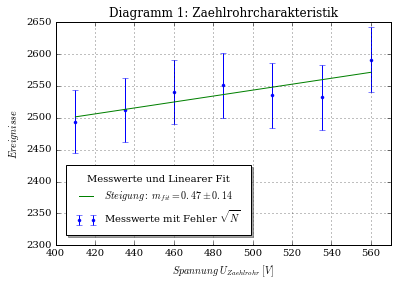

In [46]:
#A1: Graphische Darstellung der Messdaten

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#Zaehlrohrspannung:
U=np.array([410,435,460,485,510,535,560])
#gezaehlte Ereignisse
N=np.array([2494,2512,2540,2551,2535,2532,2591])
Fehler_N=np.sqrt(N)

#Fitten
from scipy.optimize import curve_fit
def linear(x,a,b):
    return a*x+b
popt, pcov=curve_fit(linear, U, N)
perr = np.sqrt(np.diag(pcov))

#Plotten
plt.errorbar(U, N, Fehler_N, fmt=".", label='Messwerte mit Fehler $\\sqrt{N}$')
plt.xlabel('$Spannung\ U_{Zaehlrohr}\  [V]$')
plt.ylabel('$Ereignisse$')
plt.title('Diagramm 1: Zaehlrohrcharakteristik')
plt.plot(U, linear(U,*popt), label='$Steigung: \; m_{fit}=%.2f \pm%.2f $' %(popt[0], perr[0]))
plt.rcParams["figure.figsize"][0] = 10
plt.rcParams["figure.figsize"][1] = 7
plt.rcParams["font.family"]='serif'
plt.axis((400, 570, 2300, 2650))
plt.legend(title='Messwerte und Linearer Fit', loc='best', borderpad=1, borderaxespad=1, shadow='true', fontsize='medium')
plt.grid(True)
plt.savefig('v251_1.pdf', format='pdf')

Aufgabe 2: Plateaubereich des Zählrohres
- Rechnung in Laborbuch

Aufgabe 3: Auswertung Daten mit hoher mittlerer Ereigniszahl

Gaussfit:
('A=', 1680.779193643617, ', Standardfehler=', 44.854619013759283)
('mu=', 77.837326640740756, ', Standardfehler=', 0.24856937657758782)
('sig=', 8.6047426516240684, ', Standardfehler=', 0.24101362210682165)
('chi2_g=', 39.090366619452737)
('chi2_red_g=', 1.221573956857898)
('Wahrscheinlichkeit Gauss=', 18.0, '%')
Poissonfit:
('A_p=', 1976.6210349739354, ', Standardfehler=', 49.245060889615921)
('mu_p=', 78.028558154121271, ', Standardfehler=', 0.24750564667965944)
('chi2_p=', 38.534492344747449)
('chi2_red_p=', 1.1677118892347711)
('Wahrscheinlichkeit Poisson=', 23.0, '%')


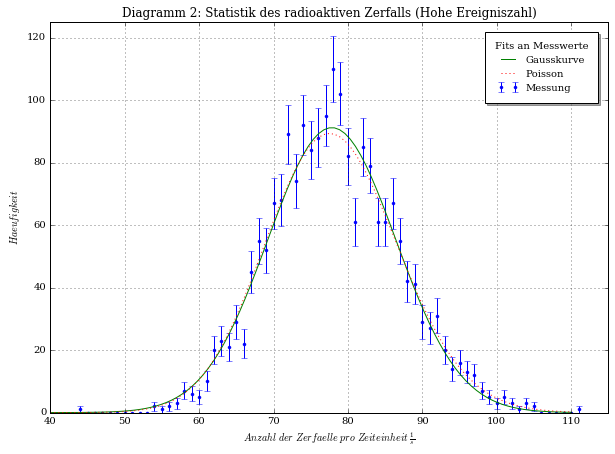

In [47]:
#Auswertung Hohe Ereigniszahl
#Daten einlesen
anzahl, haeufigkeit=np.loadtxt('Aufgabe1.dat', unpack=True)
fehler=np.sqrt(haeufigkeit)

#Fit einer Gaussfunktion
from numpy import exp, pi, sqrt
def gaussian(x, A, mu, sig): #A: Flaeche der Gaussfunktion
    return A/(2*pi*sqrt(sig))*exp(-(x-mu)**2/2/sig**2)
popt, pcov=curve_fit(gaussian,anzahl[18:-15], haeufigkeit[18:-15], p0=[2000,75,8],sigma=fehler[18:-15])

#Fit einer Poissonverteilung
from scipy.special import gamma
def poisson(x, A_p, mu_p):
    return A_p*exp(-mu_p)*mu_p**x/gamma(x+1)
popt_p, pcov_p = curve_fit(poisson, anzahl[18:-15], haeufigkeit[18:-15], p0=[2000, 75], sigma=fehler[18:-15])

#Ermitteln der Güte der Fits:
from scipy.stats import chi2
#Gauss:
chi2_g=np.sum((gaussian(anzahl[18:-15],*popt)-haeufigkeit[18:-15])**2/fehler[18:-15]**2)
dof_g=len(anzahl[18:-15])-3 #dof:degrees of freedom, Freiheitsgrad
chi2_red_g=chi2_g/dof_g
prob_g=round(1-chi2.cdf(chi2_g,dof_g),2)*100 #Fitwahrscheinlichkeit Gauss

#Poisson:
chi2_p=np.sum((poisson(anzahl[18:-15],*popt_p)-haeufigkeit[18:-15])**2/fehler[18:-15]**2)
dof_p=len(anzahl[18:-15])-2 #poisson hat nur 2 Parameter
chi2_red_p=chi2_p/dof_p
prob_p=round(1-chi2.cdf(chi2_p,dof_p),2)*100 #Fitwahrscheinlichkeit Poisson

#Ausgeben aller Werte
print("Gaussfit:")
print("A=",popt[0], ", Standardfehler=", np.sqrt(pcov[0][0]))
print("mu=",popt[1], ", Standardfehler=", np.sqrt(pcov[1][1]))
print("sig=",popt[2], ", Standardfehler=", np.sqrt(pcov[2][2]))
print("chi2_g=", chi2_g)
print("chi2_red_g=",chi2_red_g)
print("Wahrscheinlichkeit Gauss=", prob_g,"%")

print("Poissonfit:")
print("A_p=",popt_p[0], ", Standardfehler=", sqrt(pcov_p[0][0]))
print("mu_p=",popt_p[1], ", Standardfehler=", sqrt(pcov_p[1][1]))
print("chi2_p=", chi2_p)
print("chi2_red_p=",chi2_red_p)
print("Wahrscheinlichkeit Poisson=", prob_p,"%")

#Plotten der Messwerte
plt.errorbar(anzahl, haeufigkeit, fehler, fmt=".", label='Messung')
plt.xlabel('$Anzahl\ der\ Zerfaelle\ pro\ Zeiteinheit\; \\frac{1}{s} $')
plt.ylabel('$Haeufigkeit$')
plt.title('Diagramm 2: Statistik des radioaktiven Zerfalls (Hohe Ereigniszahl)')

x=np.linspace(40,110, 100)
plt.plot(x, gaussian(x,*popt), label='Gausskurve')
plt.plot(x, poisson(x,*popt_p), label='Poisson',linestyle=':')
plt.legend(title='Fits an Messwerte', loc='best', borderpad=1, borderaxespad=1, shadow='true', fontsize='medium')
plt.rcParams["figure.figsize"][0] = 9
plt.rcParams["figure.figsize"][1] = 6
plt.rcParams["font.family"]='serif'
plt.axis((40, 115, 0, 125))
plt.grid(True)

plt.savefig("v251_2.pdf", format="pdf")

Aufgabe 4: Auswertung der Daten mit kleiner mittlerer Ereigniszahl

Gaussfit:
('A=', 8645.5573471426251, ', Standardfehler=', 495.2470952671074)
('mu=', 4.4613243782163394, ', Standardfehler=', 0.11427744035213443)
('sig=', 2.0367841926340629, ', Standardfehler=', 0.08958988577276418)
('chi2_g=', 113.52050336219119)
('chi2_red_g=', 14.190062920273899)
('Wahrscheinlichkeit Gauss=', 0.0, '%')
Poissonfit:
('A_p=', 5027.8697072956329, ', Standardfehler=', 37.261793645675759)
('mu_p=', 4.5337731686723508, ', Standardfehler=', 0.016238530052490402)
('chi2_p=', 2.466456717872632)
('chi2_red_p=', 0.27405074643029242)
('Wahrscheinlichkeit Poisson=', 98.0, '%')


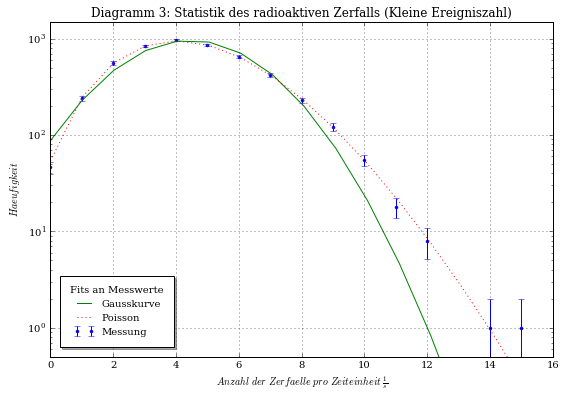

In [43]:
#Auswertung Kleine Ereigniszahl
#Daten einlesen
anzahl, haeufigkeit=np.loadtxt('Aufgabe2.dat', unpack=True)
fehler=np.sqrt(haeufigkeit)

#Fit einer Gaussfunktion
from numpy import exp, pi, sqrt
def gaussian(x, A, mu, sig): #A: Flaeche der Gaussfunktion
    return A/(2*pi*sqrt(sig))*exp(-(x-mu)**2/2/sig**2)
popt, pcov=curve_fit(gaussian,anzahl[0:-5], haeufigkeit[0:-5], p0=[9000,5,2],sigma=fehler[0:-5])

#Fit einer Poissonverteilung
from scipy.special import gamma
def poisson(x, A_p, mu_p):
    return A_p*exp(-mu_p)*mu_p**x/gamma(x+1)
popt_p, pcov_p = curve_fit(poisson, anzahl[0:-5], haeufigkeit[0:-5], p0=[5000, 5], sigma=fehler[0:-5])

#Ermitteln der Güte der Fits:
from scipy.stats import chi2
#Gauss:
chi2_g=np.sum((gaussian(anzahl[0:-5],*popt)-haeufigkeit[0:-5])**2/fehler[0:-5]**2)
dof_g=len(anzahl[0:-5])-3 #dof:degrees of freedom, Freiheitsgrad
chi2_red_g=chi2_g/dof_g
prob_g=round(1-chi2.cdf(chi2_g,dof_g),2)*100 #Fitwahrscheinlichkeit Gauss

#Poisson:
chi2_p=np.sum((poisson(anzahl[0:-5],*popt_p)-haeufigkeit[0:-5])**2/fehler[0:-5]**2)
dof_p=len(anzahl[0:-5])-2 #poisson hat nur 2 Parameter
chi2_red_p=chi2_p/dof_p
prob_p=round(1-chi2.cdf(chi2_p,dof_p),2)*100 #Fitwahrscheinlichkeit Poisson

#Ausgeben aller Werte
print("Gaussfit:")
print("A=",popt[0], ", Standardfehler=", np.sqrt(pcov[0][0]))
print("mu=",popt[1], ", Standardfehler=", np.sqrt(pcov[1][1]))
print("sig=",popt[2], ", Standardfehler=", np.sqrt(pcov[2][2]))
print("chi2_g=", chi2_g)
print("chi2_red_g=",chi2_red_g)
print("Wahrscheinlichkeit Gauss=", prob_g,"%")

print("Poissonfit:")
print("A_p=",popt_p[0], ", Standardfehler=", sqrt(pcov_p[0][0]))
print("mu_p=",popt_p[1], ", Standardfehler=", sqrt(pcov_p[1][1]))
print("chi2_p=", chi2_p)
print("chi2_red_p=",chi2_red_p)
print("Wahrscheinlichkeit Poisson=", prob_p,"%")

#Plotten der Messwerte
plt.errorbar(anzahl, haeufigkeit, fehler, fmt=".", label='Messung')
plt.xlabel('$Anzahl\ der\ Zerfaelle\ pro\ Zeiteinheit\; \\frac{1}{s} $')
plt.ylabel('$Haeufigkeit$')
plt.title('Diagramm 3: Statistik des radioaktiven Zerfalls (Kleine Ereigniszahl)')

x=np.linspace(0,100, 100)
plt.yscale('log')
plt.plot(x, gaussian(x,*popt), label='Gausskurve')
plt.plot(x, poisson(x,*popt_p), label='Poisson',linestyle=':')
plt.legend(title='Fits an Messwerte', loc='lower left', borderpad=1, borderaxespad=1, shadow='true', fontsize='medium')
plt.rcParams["figure.figsize"][0] = 8
plt.rcParams["figure.figsize"][1] = 5
plt.rcParams["font.family"]='serif'
plt.axis((0, 16, 0.5, 1500))
plt.grid(True)
plt.savefig("v251_3.pdf", format="pdf")